
<div class="">
    <h2 align="center">Machine Learning in Python</h2>
    <h3 align="center"> Random Forest </h3>
    <h4 align="center"><a href=""></a></h5>
    
</div>

# Random Forest Classification
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that works by creating a multitude of decision trees during training. For classification tasks, the output of the random forest is the class selected by most trees.

<img src = "https://www.mdpi.com/processes/processes-07-00337/article_deploy/html/images/processes-07-00337-g001-550.jpg" width=75%>

## Importing the libraries

In [34]:
##import sys
##print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import shap

In [54]:
shap.__version__

'0.46.0'

## Importing the dataset

In [56]:
df1=pd.read_csv(r"E:\Maryam\Python\14030922\DT - RF - XGBoost\train.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Importing dataset
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Encoding 

In [60]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [62]:
df1.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [64]:
# Data Preprocessing and null values imputation
# Label Encoding
df1['Gender']=df1['Gender'].map({'Male':1,'Female':0})
df1['Married']=df1['Married'].map({'Yes':1,'No':0})
df1['Education']=df1['Education'].map({'Graduate':1,'Not Graduate':0})
df1['Dependents'].replace('3+',3,inplace=True)
df1['Self_Employed']=df1['Self_Employed'].map({'Yes':1,'No':0})
df1['Property_Area']=df1['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df1['Loan_Status']=df1['Loan_Status'].map({'Y':1,'N':0})

C:\Users\User\AppData\Local\Temp\ipykernel_18996\904292521.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Dependents'].replace('3+',3,inplace=True)


## Missing Value

In [66]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [68]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [236]:
df1['Gender'].value_counts(normalize=True)*100

Gender
1.0      79.641694
0.0      18.241042
342.0     2.117264
Name: proportion, dtype: float64

### Mean, Median, or Mode Imputation

In [72]:
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
df1[rev_null]=df1[rev_null].replace({np.nan:df1['Gender'].mode(),
                                   np.nan:df1['Married'].mode(),
                                   np.nan:df1['Dependents'].mode(),
                                   np.nan:df1['Self_Employed'].mode(),
                                   np.nan:df1['Credit_History'].mode(),
                                   np.nan:df1['LoanAmount'].mean(),
                                   np.nan:df1['Loan_Amount_Term'].mean()})

In [74]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Splitting the dataset into the Training set and Test set

In [38]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,342.0,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [76]:
# Splitting traing data
X=df1.drop(columns=['Loan_ID','Loan_Status']).values
y=df1['Loan_Status'].values

In [134]:
X

array([[1.0, 0.0, '0', ..., 360.0, 1.0, 2],
       [1.0, 1.0, '1', ..., 360.0, 1.0, 3],
       [1.0, 1.0, '0', ..., 360.0, 1.0, 2],
       ...,
       [1.0, 1.0, '1', ..., 360.0, 1.0, 2],
       [1.0, 1.0, '2', ..., 360.0, 1.0, 2],
       [0.0, 0.0, '0', ..., 360.0, 0.0, 1]], dtype=object)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
X_train

array([[-0.15301346, -0.06914495, -0.1739714 , ...,  0.28486204,
        -0.29836116,  0.09129894],
       [-0.15301346, -0.10553704, -0.19103106, ...,  0.28486204,
        -0.29836116,  1.3265199 ],
       [-0.15301346, -0.10553704, -0.15691175, ...,  0.28486204,
        -0.29836116,  1.3265199 ],
       ...,
       [-0.15301346, -0.06914495, -0.13985209, ...,  0.28486204,
        -0.29836116, -1.14392202],
       [-0.15301346, -0.06914495, -0.19103106, ...,  0.28486204,
        -0.29836116,  0.09129894],
       [-0.17219749, -0.06914495, -0.19103106, ...,  0.28486204,
        -0.29836116, -1.14392202]])

In [84]:
X_test

array([[-0.15301346, -0.10553704, -0.19103106, ...,  0.28486204,
        -0.29836116, -1.14392202],
       [-0.17219749, -0.10553704, -0.19103106, ...,  0.28486204,
        -0.29836116, -1.14392202],
       [-0.15301346, -0.06914495, -0.19103106, ...,  0.28486204,
        -0.29836116,  0.09129894],
       ...,
       [-0.15301346, -0.06914495, -0.19103106, ...,  0.28486204,
        -0.29836116,  0.09129894],
       [-0.15301346, -0.10553704, -0.19103106, ...,  0.28486204,
        -0.29836116, -1.14392202],
       [-0.15301346, -0.06914495, -0.1739714 , ...,  0.28486204,
        -0.30900865, -1.14392202]])

## Random Forest model

In [86]:
# Building  Random Forest Classifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 0.9840764331210191


## Predicting a new result

In [88]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.8669527896995708


In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 62.5+ KB


In [92]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Important Features

In [94]:
rfc.feature_importances_

array([0.01981451, 0.02861415, 0.06697858, 0.02541951, 0.02897685,
       0.21255341, 0.12434671, 0.18752116, 0.03743856, 0.22129415,
       0.0470424 ])

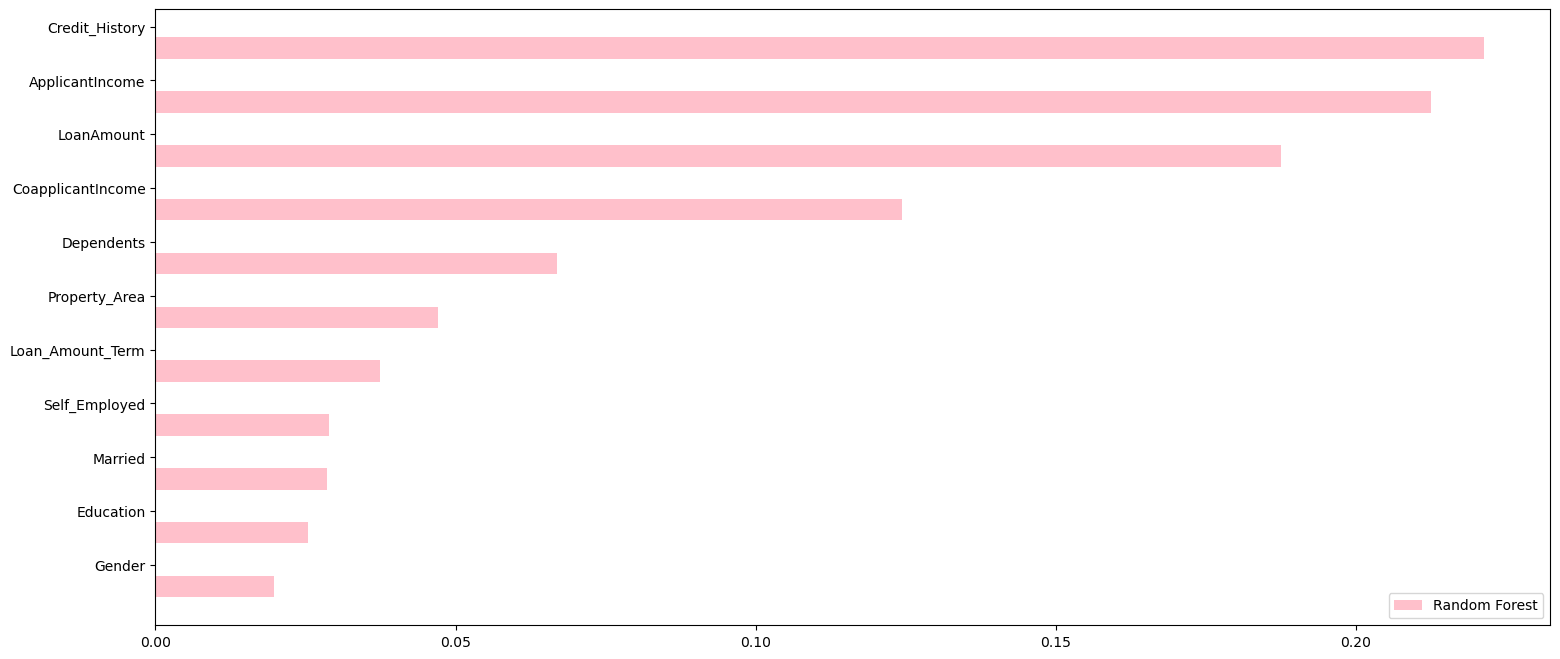

In [201]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=df1.drop(columns=['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='pink',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

> Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern.

In [233]:
# محاسبه shap_values برای داده‌های آموزشی
shap_values = explainer.shap_values(X_train)

print("Shape of X_train:", X_train.shape)
print("Shape of shap_values for class 1:", shap_values[1].shape)

Shape of X_train: (460, 11)
Shape of shap_values for class 1: (11, 2)


### Partial Dependence Plot (PDP):
> Visualizes the relationship between a feature and the predicted outcome of a machine learning model, while keeping other features constant. It helps to understand the effect of individual features on the model's predictions.

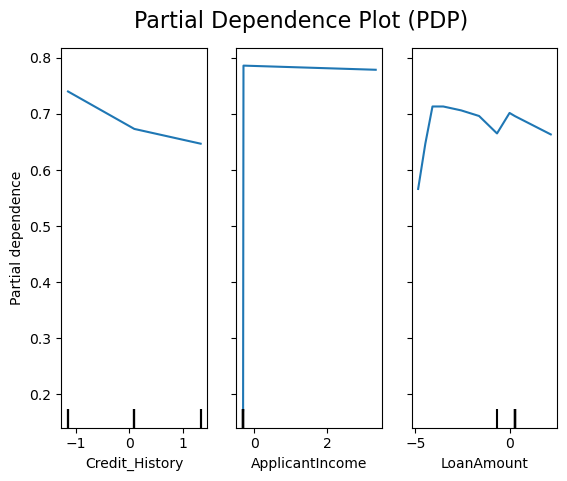

In [227]:
#from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
# انتخاب دو ویژگی با اهمیت بالا
#features_to_plot = feature_importance.index[-2:]  # دو ویژگی مهم
features_to_plot = feature_importance.index[-3:]  # سه ویژگی مهم

#fig, ax = plt.subplots(figsize=(12, 6))
display = PartialDependenceDisplay.from_estimator(
    rfc, 
    X_train, 
 #   features=[features_to_plot[0], features_to_plot[1]],  # ویژگی‌های انتخاب‌شده
    features=[features_to_plot[2], features_to_plot[1] , features_to_plot[0]],
    feature_names=feature_importance.index,
    grid_resolution=50  # تنظیمات جزئیات نمودار
)
plt.suptitle('Partial Dependence Plot (PDP)', fontsize=16)
plt.subplots_adjust(top=0.9)  # برای تنظیم موقعیت عنوان
plt.show()
